## Dependencies

In [1]:
# Filepaths, Python Imaging,, numpy and panas 
import os
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
# Sklearn scaling
from sklearn.preprocessing import StandardScaler

### Load the Plant Disease dataset from local desktop

In [3]:
base_dir = r'ENTER_YOUR_FILE_PATH_HERE'

# Collect all images & preprocessing

In [4]:
# For loop to pull 1500 images from healthy and 167 from all others for even split of healthy vs unhealthy logistic regression
def load_images_from_subfolders(base_folder):
    images = []
    labels = []
    max_images_healthy = 1500
    max_images_others = 167

    for root, dirs, files in os.walk(base_folder):
        folder_name = os.path.basename(root)
        if folder_name.startswith("Tomato_"):
            image_count = 0 
            if folder_name == "Tomato_healthy":
               max_images = max_images_healthy
            else:
                max_images = max_images_others

            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    if image_count >= max_images:
                        break
                    img_path = os.path.join(root, file)
                    #print(f"Loading {img_path}")
                    try:
                        img = Image.open(img_path).convert('RGB')
                        img = img.resize((28, 28))
                        images.append(np.array(img))
                        labels.append(folder_name) 
                        image_count += 1
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")

    return np.array(images), np.array(labels)

all_images, labels = load_images_from_subfolders(base_dir)
print(f'Total number of images: {all_images.shape[0]}')

Total number of images: 6006


In [5]:
# Normalizing all images using fit_transform
n_samples, height, width, n_channels = all_images.shape
flattened_images = all_images.reshape((n_samples, -1))

scaler = StandardScaler()
flattened_images_scaled = scaler.fit_transform(flattened_images)

# Create dataframe from scaled and flattened images
df_scaled_images = pd.DataFrame(flattened_images_scaled)

# Add Label (i.e. Category) to the dataframe
df_scaled_images['label'] = labels

# Save dataframe to CSV locally due to size
file_path = r'ENTER_YOUR_FILE_PATH_HERE'
df_scaled_images.to_csv(file_path, index=False)

# Review normalized images

In [6]:
# Review the dataframe
df_scaled_images.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,0.509069,0.543782,0.203630,0.514034,0.551566,0.209897,0.548410,0.588554,0.248520,0.469272,...,-0.331893,-0.374229,-0.528024,-0.373123,-0.385091,-0.575035,-0.320599,-0.327442,-0.523437,Tomato_Bacterial_spot
1,-0.645186,-0.750117,-1.108201,-0.685108,-0.792221,-1.150344,-0.613734,-0.722766,-1.081046,-0.543298,...,1.161029,1.384871,1.093676,1.228654,1.456097,1.158420,1.226318,1.451978,1.154496,Tomato_Bacterial_spot
2,-0.760612,-0.635949,-1.070720,-0.723790,-0.600252,-1.036991,-0.807425,-0.684198,-1.119034,-0.815913,...,1.071454,1.416855,1.063078,1.107765,1.423795,1.127465,0.923001,1.225506,0.968059,Tomato_Bacterial_spot
3,0.855345,1.038508,0.728362,0.900854,1.089081,0.776664,0.780838,0.974236,0.666383,0.663997,...,0.145842,0.233460,-0.069052,0.019766,0.099432,-0.172626,-0.017282,0.060795,-0.243782,Tomato_Bacterial_spot
4,1.163147,1.190731,0.840805,1.132946,1.165869,0.852233,1.129481,1.167078,0.894308,1.092392,...,-0.302035,-0.566130,-0.803407,-0.403345,-0.643503,-0.884581,-0.290267,-0.489207,-0.740947,Tomato_Bacterial_spot


In [7]:
# Review the shape of the images
df_scaled_images.shape

(6006, 2353)

In [8]:
# Review unique labels
df_scaled_images['label'].unique().tolist()

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [9]:
label_count = df_scaled_images['label'].value_counts().sort_values(ascending=True)
label_count

label
Tomato_Bacterial_spot                           334
Tomato_Early_blight                             334
Tomato_Late_blight                              334
Tomato_Leaf_Mold                                334
Tomato_Septoria_leaf_spot                       334
Tomato_Spider_mites_Two_spotted_spider_mite     334
Tomato__Target_Spot                             334
Tomato__Tomato_mosaic_virus                     334
Tomato__Tomato_YellowLeaf__Curl_Virus           334
Tomato_healthy                                 3000
Name: count, dtype: int64

# Visualize images by disease

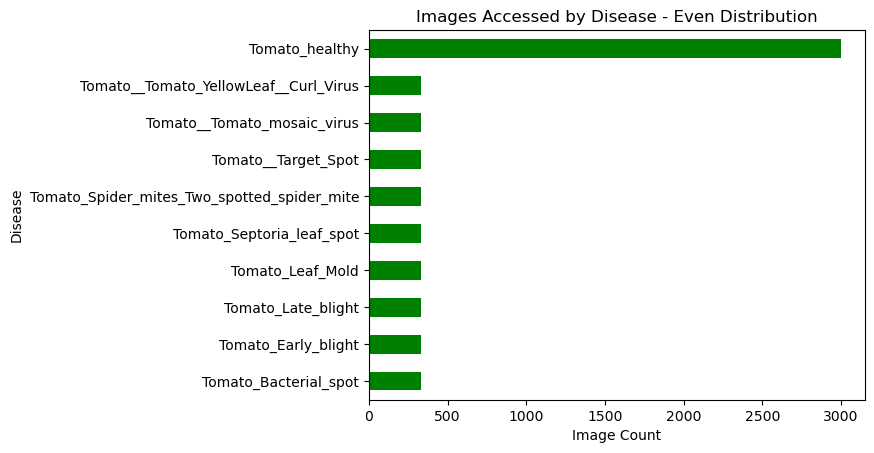

In [10]:
import matplotlib.pyplot as plt
label_count.plot(kind='barh', color='green')
plt.title('Images Accessed by Disease - Even Distribution')
plt.xlabel('Image Count')
plt.ylabel('Disease')
plt.savefig('..\Output\images_accessed_by_disease_even_distro.png',  dpi=300, bbox_inches='tight')
plt.show()